## Fashion MNIST Classification project

In [1]:
#Checking the gpu availability in mac for using torch
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [2]:
#importing dependencies 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#from prettytable import PrettyTable
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




sns.set_style('darkgrid')


ModuleNotFoundError: No module named 'seaborn'

## Loading Fashion MNIST Dataset

In [63]:
#Load Fashion-Mnist Dataset
fashion_mnist = fetch_openml(name="Fashion-MNIST", cache = True)
fashion_mnist_df = pd.DataFrame(fashion_mnist.data, columns=fashion_mnist.feature_names)
fashion_mnist_df['target'] = fashion_mnist['target'].astype(int)
fashion_mnist_df.

/Users/saptarshimondal/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
fashion_mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
fashion_mnist_df.shape

(70000, 785)

In [62]:
#Checking missing values in the dataset
fashion_mnist_df.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
target      0
Length: 785, dtype: int64

We see that there are no missing values in the dataset.

In [6]:
X = fashion_mnist_df.drop('target', axis = 1).values #Get the data 28x28 total 784 features
y = fashion_mnist_df['target'].values #Get the target values or class

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
class_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
def true_label(x):
    return class_mapping[x]

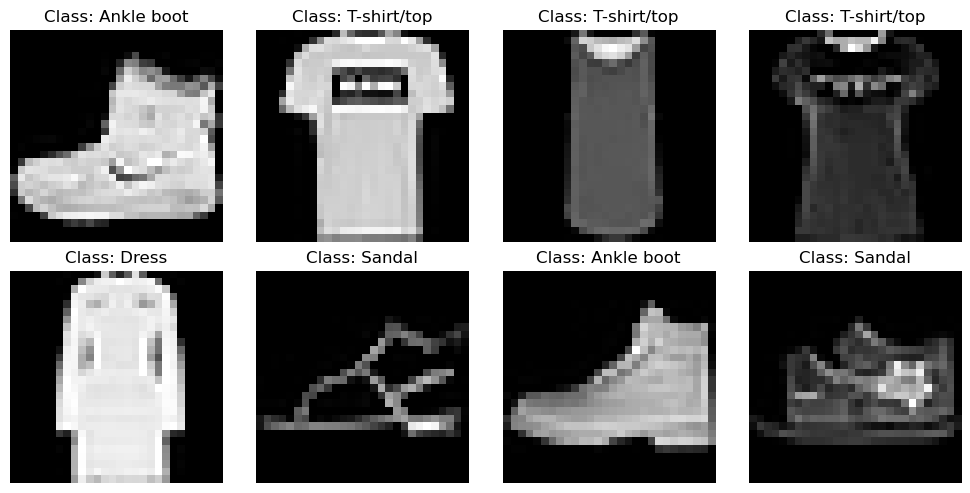

In [12]:
plt.figure(figsize=(10, 5))
k = [0, 1, 2, 34, 500, 14578, 50000, 69999]

for i, example in enumerate(k, 1):
    plt.subplot(2, 4, i)
    g = plt.imshow(X.reshape(-1, 28, 28, 1)[example][:, :, 0], cmap=plt.cm.binary)
    plt.title('Class: ' + true_label(y[example]))
    plt.axis('off')

plt.tight_layout()
plt.show()

## EDA

In [30]:
fashion_mnist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to target
dtypes: float64(784), int64(1)
memory usage: 419.2 MB


In [35]:
fashion_mnist_df.iloc[:,:-1].describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000
mean,0.000771,0.006414,0.034486,0.098886,0.247843,0.408714,0.802900,2.204386,5.634900,14.41000,...,34.582314,23.288643,16.611600,17.823371,22.887986,17.968129,8.524043,2.75140,0.836529,0.072914
std,0.087339,0.296605,1.200882,2.458872,4.408110,5.842288,8.186472,14.117208,23.698865,38.18827,...,57.584612,48.935288,42.075046,43.901606,51.853192,45.231601,29.527900,17.38577,9.258426,2.129924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,16.000000,45.000000,218.000000,185.000000,227.000000,230.000000,224.000000,225.000000,254.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,170.000000


0    7000
1    7000
2    7000
3    7000
4    7000
5    7000
6    7000
7    7000
8    7000
9    7000
Name: target, dtype: int64

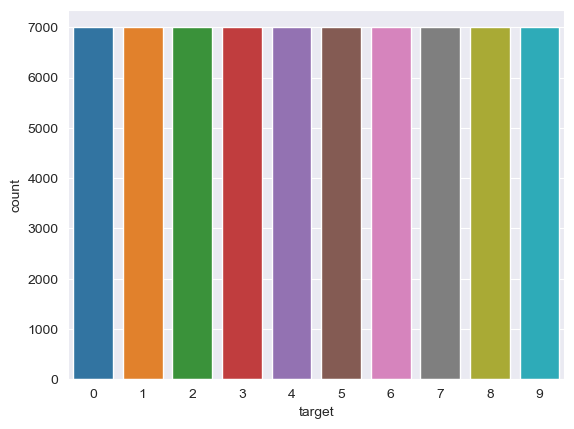

In [29]:
#Plot distribution of classes in the dataset.
sns.countplot(x = fashion_mnist_df.target)
fashion_mnist_df.target.value_counts().sort_index()

## Data Preprocessing

In [55]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
print(X_train[:5]) 

[[-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]]
